In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\\supershop.csv")

In [3]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
#null value handling

In [5]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [6]:
df.isnull().sum().sum() # Total 1 null value

1

In [7]:
df.shape

(50, 5)

<AxesSubplot:>

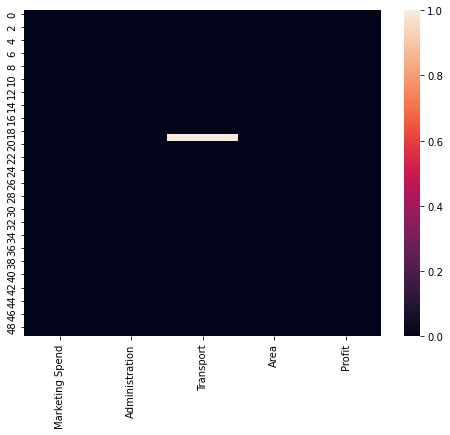

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [9]:
df['Transport'] = df['Transport'].fillna(df['Transport'].mean())

<AxesSubplot:>

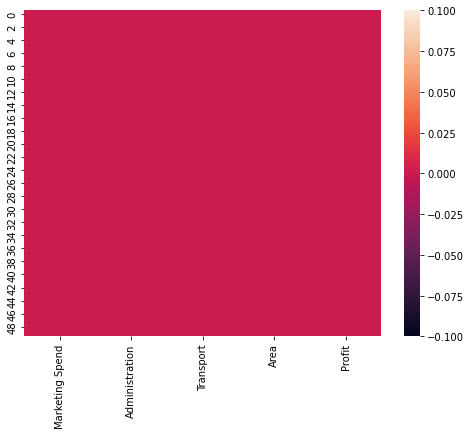

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [12]:
# prepossessing

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['Area'] = le.fit_transform(df['Area'])

In [15]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [16]:
# separate x and y

In [17]:
x = df.drop('Profit',axis=1)
y = df['Profit']

In [18]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,1
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,2
3,144372.41,118671.85,383199.62,1
4,142107.34,91391.77,366168.42,2


In [19]:
# train test split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.3, random_state=1)

In [22]:
# Linear Regression 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [26]:
lr.predict([[142107,91391,366168,2]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([165240.46845009])

In [27]:
lr.predict(xtest)

array([128523.85817344,  92876.23166134,  82822.47768708,  74516.64570607,
       177310.96394258, 171350.68669007,  40476.97540817,  98053.04881798,
        81121.43605441,  93310.799139  ,  88010.25155613,  85419.3298334 ,
       127955.49740722,  85934.52575582, 122418.36491094])

In [28]:
lr.score(xtest,ytest)

0.8986200525800976